# Data Exploration
My data set is the mitbih data base which is composed of heart rate singlals for 48 people. Individual beats in a givin heart rate signal are either a normal beat or an arrhythmia. My overall goal is to develop is to be train a machine learning algorithm to classify individual beats as either normal, or as one of 4 types of arthmies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Load in a heart beat signal and its associated annotations file

In [2]:
mitbih_dir = 'archive/mitbih_database/';
HB_signal = np.loadtxt(mitbih_dir + '100.csv',skiprows =1, delimiter=',')
HB_info = pd.read_table(mitbih_dir + '100annotations.txt', delim_whitespace=True, engine='python')

## A peek at the heart beat signal in the first file. 

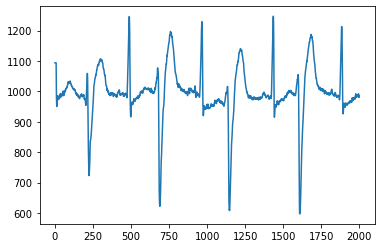

In [95]:
low = 0
high = 2000    
plt.plot(HB_signal[low:high,0],data[low:high,1])

## What's in the annotations file?
I am interested in the sample columb and the # columb. The sample columb identifies the R-peak for the heart rate signal. The # columb contains information about each beat. For instance N would be a normal beat (row 1-7), A is an atrial premature beat (row 8). There are other labels, do not specifically classify a beat. For example + (row 0) indicates a rhythm change. 

source: https://archive.physionet.org/physiobank/annotations.shtml

In [106]:
HB_info.head(9)

,Time,Sample,#,Type,Sub,Chan,Num,Aux
0,0:00.050,18,+,0,0,0,(N,NaN
1,0:00.214,77,N,0,0,0,None,NaN
2,0:01.028,370,N,0,0,0,None,NaN
3,0:01.839,662,N,0,0,0,None,NaN
4,0:02.628,946,N,0,0,0,None,NaN
5,0:03.419,1231,N,0,0,0,None,NaN
6,0:04.208,1515,N,0,0,0,None,NaN
7,0:05.025,1809,N,0,0,0,None,NaN
8,0:05.678,2044,A,0,0,0,None,NaN


## All of the symbols
Here I go through all of the annotation files to determine all of the symbols in the # columb and how offten that symbol occurs. I first list which beats each file contains. 

In [36]:
mitbih_dir = 'archive/mitbih_database/';
file_list = os.listdir(mitbih_dir);
anot_all = pd.DataFrame()

#first combine all annotation files into a single data frame.
for file_name in file_list:
    if 'annotations.txt' in file_name: #only open annotation files.
        anot = pd.read_table(mitbih_dir + file_name, delim_whitespace=True, engine='python')
        print(file_name)
        print(anot['#'].value_counts())
        anot_all = anot_all.append(anot);
        
#second get a count of all the unique values in the # col
anot_all['#'].value_counts()

100annotations.txt
N    2239
A      33
+       1
V       1
Name: #, dtype: int64
101annotations.txt
N    1860
|       4
~       4
A       3
Q       2
+       1
Name: #, dtype: int64
102annotations.txt
/    2028
N      99
f      56
+       5
V       4
Name: #, dtype: int64
103annotations.txt
N    2082
~       6
A       2
+       1
Name: #, dtype: int64
104annotations.txt
/    1380
f     666
N     163
+      45
~      37
Q      18
V       2
Name: #, dtype: int64
105annotations.txt
N    2526
~      88
V      41
|      30
Q       5
+       1
Name: #, dtype: int64
106annotations.txt
N    1507
V     520
+      41
~      30
Name: #, dtype: int64
107annotations.txt
/    2078
V      59
~       2
+       1
Name: #, dtype: int64
108annotations.txt
N    1739
~      41
V      17
x      11
|       8
A       4
F       2
j       1
+       1
Name: #, dtype: int64
109annotations.txt
L    2492
V      38
~       2
F       2
+       1
Name: #, dtype: int64
111annotations.txt
L    2123
~       8
+       1
V

N    75052
L     8075
R     7259
V     7130
/     7028
A     2546
+     1291
f      982
F      803
~      616
!      472
"      437
j      229
x      193
a      150
|      132
E      106
J       83
Q       33
e       16
[        6
]        6
S        2
Name: #, dtype: int64

## Classes
I will focus on classify the first 5 beat types. Here I create a dictonary for those classes.

In [ ]:
Classes_names = {
    'N': 'Normal beat', 
    'L': 'Left bundle branch block beat', 
    'R': 'Right bundle branch block beat', 
    'A': 'Atrial premature beat', 
    'V': 'Premature ventricular contraction'
}

Classes_index = {
    'N': 0, 
    'L': 1, 
    'R': 2, 
    'A': 3, 
    'V': 4
}
Classes = {
    0:'N', 
    1:'L', 
    2:'R', 
    3:'A',
    4:'V'
}

## Sample beats for each type of beat

In [3]:
#Contains N and A
#HB_100 = np.loadtxt(mitbih_dir + '100.csv',skiprows =1, delimiter=',') 
#info_100 = pd.read_table(mitbih_dir + '100annotations.txt', delim_whitespace=True, engine='python')
def plot_beat(file_num,beat_type, beatNum = -1):
    
    HB_signal = np.loadtxt('%s%i.csv'%(mitbih_dir,file_num),skiprows =1, delimiter=',') 
    HB_info = pd.read_table('%s%iannotations.txt'%(mitbih_dir,file_num), delim_whitespace=True, engine='python')
    locs = HB_info[HB_info['#'] == beat_type]
    beatNum = np.random.randint(len(locs));

    if beatNum == -1:
        beatNum = np.random.randint(len(beat_locs))
        print(beatNum)
    ii = locs.index[beatNum]
    start = int(HB_info['Sample'].iloc[ii] - (HB_info['Sample'].iloc[ii]-HB_info['Sample'].iloc[ii-1])*4  )
    end  = int( (HB_info['Sample'].iloc[ii+1] - HB_info['Sample'].iloc[ii])*10 + HB_info['Sample'].iloc[ii] )
    mid = HB_info['Sample'].iloc[ii]
    xc = HB_signal[mid,0]
    #print(start)
    plt.plot(HB_signal[start:end,0],HB_signal[start:end,1])
    y_min = min(HB_signal[start:end,1])
    y_max = max(HB_signal[start:end,1])
    plt.plot([xc,xc],[y_min,y_max])


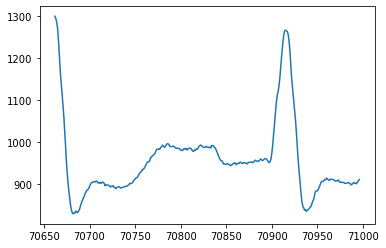

In [286]:
plot_beat(109,'L')

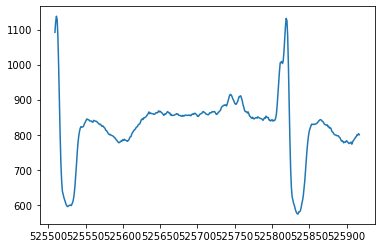

In [287]:
plot_beat(118,'R')


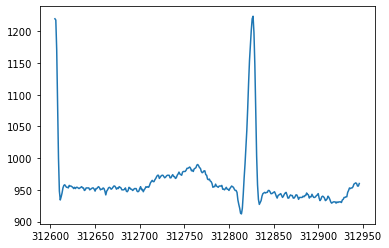

In [288]:
plot_beat(100,'A')

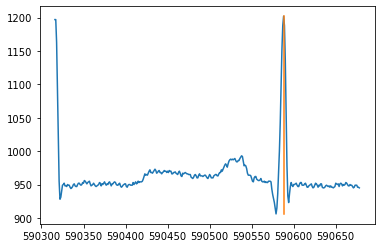

In [30]:
plot_beat(100,'N')

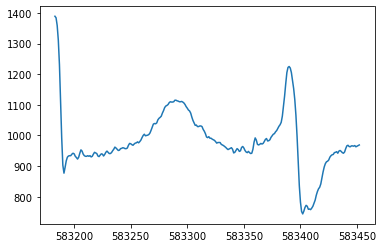

In [290]:
plot_beat(106,'V')

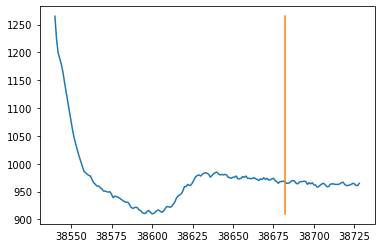

In [34]:
plot_beat(102,'+') # doesn't actually correspond to the peak an R-peak so will need to be splitting beats

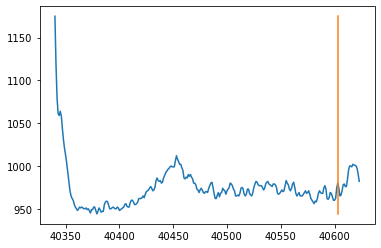

In [40]:
plot_beat(101,'~') # doesn't actually correspond to the peak an R-peak so will need to be splitting beats

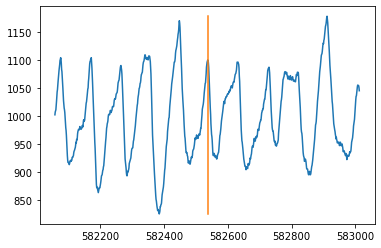

In [48]:
plot_beat(207,'!') # ???

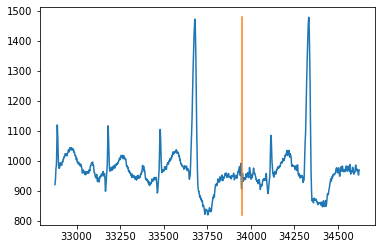

In [62]:
plot_beat(228,'|') # doesn't actually correspond to the peak an R-peak so will need to be splitting beats

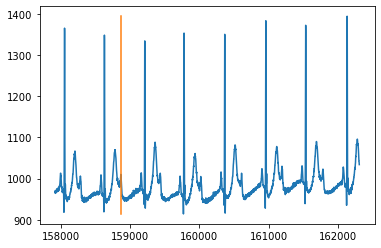

In [4]:
plot_beat(231,'"') # doesn't actually correspond to the peak an R-peak so will need to be splitting beats

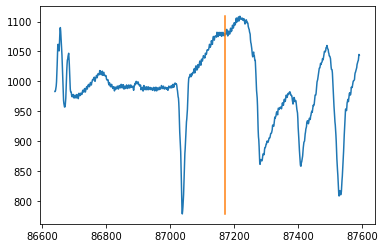

In [66]:
plot_beat(207,'[') # doesn't actually correspond to the peak an R-peak so will need to be splitting beats

In [ ]:
plot_beat(231,']') # doesn't actually correspond to the peak an R-peak so will need to be splitting beats